In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
TrainData = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/TrainDataFlight.csv")
TestData = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/TestDataFlight.csv")

In [3]:
TrainData.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Cypselurus,35.0,38.5,44.1,18.0369,6.3063,920.0
1,Hirundichthys,10.0,10.5,11.6,1.9720,1.1600,7.5
2,Cypselurus,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Exocoetus,24.0,26.0,29.2,8.8768,4.4968,290.0
4,Parexocoetus,18.4,20.0,22.4,8.8928,3.2928,150.0


In [4]:
TrainData.describe()

,Length1,Length2,Length3,Height,Width,Weight
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,26.836975,29.056303,31.956303,9.186697,4.463197,414.822689
std,10.368023,11.101318,11.964387,4.237880,1.637972,374.921759
min,7.500000,8.400000,8.800000,1.728400,1.148400,0.000000
25%,19.350000,21.150000,23.350000,6.110000,3.385650,127.500000
50%,25.400000,27.500000,30.100000,7.786000,4.305600,290.000000
75%,33.250000,36.200000,40.150000,12.462000,5.472750,667.500000
max,59.000000,63.400000,68.000000,18.754200,8.142000,1650.000000


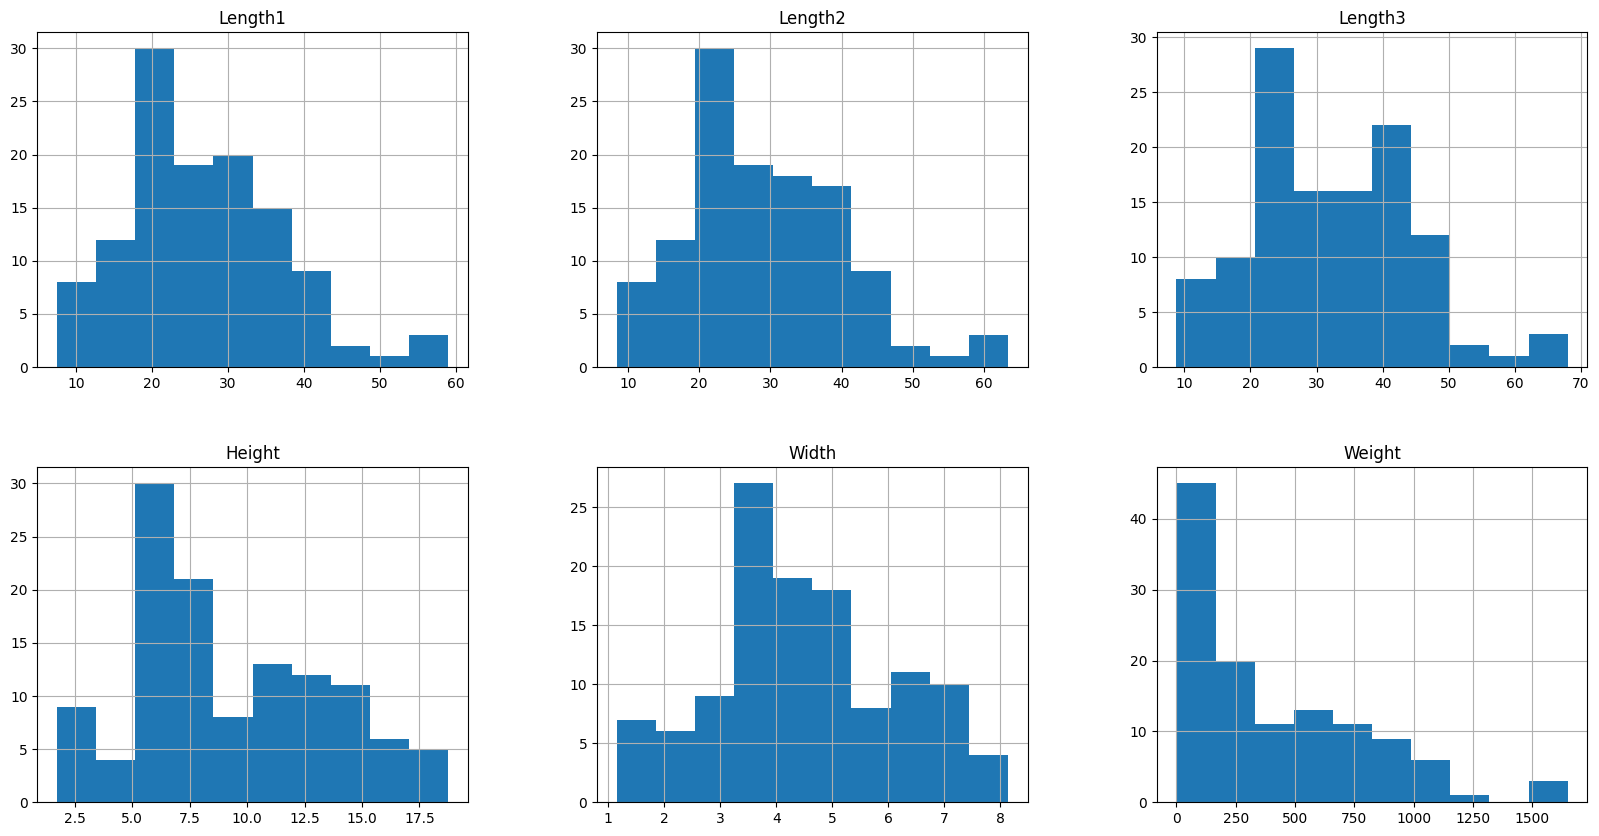

In [5]:
TrainData.hist(figsize=(20, 10), layout=(2, 3));

In [6]:
(TrainData.drop('Species', axis = 1)).corr()

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999583,0.992517,0.589858,0.869826,0.924209
Length2,0.999583,1.000000,0.994302,0.604021,0.876383,0.927185
Length3,0.992517,0.994302,1.000000,0.667966,0.881903,0.929916
Height,0.589858,0.604021,0.667966,1.000000,0.777551,0.690560
Width,0.869826,0.876383,0.881903,0.777551,1.000000,0.888698
Weight,0.924209,0.927185,0.929916,0.690560,0.888698,1.000000


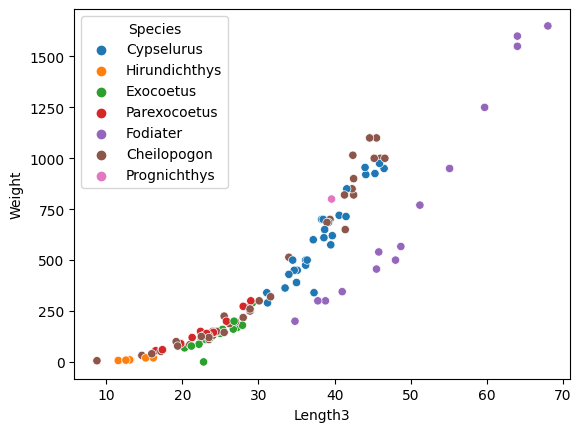

In [13]:
sns.scatterplot(data = TrainData, x='Length3', y='Weight', hue = 'Species');

In [21]:
TrainData.sort_values('Weight')

,Species,Length1,Length2,Length3,Height,Width,Weight
112,Exocoetus,19.0,20.5,22.8,6.4752,3.3516,0.0
75,Cheilopogon,7.5,8.4,8.8,2.1120,1.4080,5.9
21,Hirundichthys,10.1,10.6,11.6,1.7284,1.1484,7.0
1,Hirundichthys,10.0,10.5,11.6,1.9720,1.1600,7.5
102,Hirundichthys,10.8,11.3,12.6,1.9782,1.2852,8.7
...,...,...,...,...,...,...,...
29,Cheilopogon,40.1,43.0,45.5,12.5125,7.4165,1100.0
83,Fodiater,52.0,56.0,59.7,10.6863,6.9849,1250.0
66,Fodiater,56.0,60.0,64.0,9.6000,6.1440,1550.0
70,Fodiater,56.0,60.0,64.0,9.6000,6.1440,1600.0


In [14]:
TrainData = TrainData[TrainData['Weight'] < 1300]
TrainData = TrainData[TrainData['Weight'] > 1]
TrainData['Length3'] = np.log(TrainData['Length3'])
TrainData['Height'] = np.log(TrainData['Height'])
TrainData['Weight'] = np.log(TrainData['Weight'])
TrainData['Width'] = np.log(TrainData['Width'])
TestData['Length3'] = np.log(TestData['Length3'])
TestData['Height'] = np.log(TestData['Height'])
TestData['Width'] = np.log(TestData['Width'])

In [15]:
(TrainData.drop('Species', axis = 1)).corr()

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999474,0.958290,0.701692,0.862357,0.894671
Length2,0.999474,1.000000,0.962757,0.716004,0.871642,0.902985
Length3,0.958290,0.962757,1.000000,0.839038,0.936067,0.971021
Height,0.701692,0.716004,0.839038,1.000000,0.886826,0.916615
Width,0.862357,0.871642,0.936067,0.886826,1.000000,0.980167
Weight,0.894671,0.902985,0.971021,0.916615,0.980167,1.000000


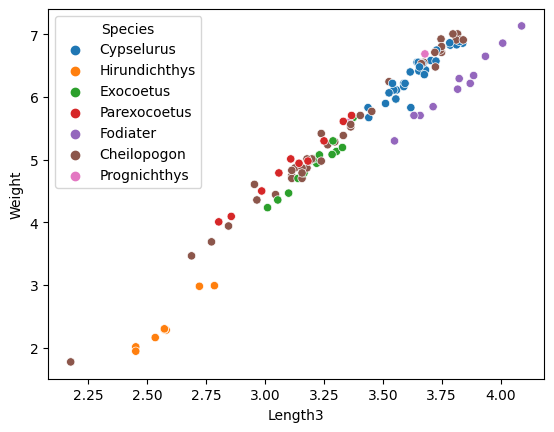

In [16]:
sns.scatterplot(data = TrainData, x='Length3', y='Weight', hue = 'Species');

In [20]:
X = TrainData.drop(['Weight','Length1','Length2'], axis=1)
y = TrainData['Weight']

In [21]:
X = pd.get_dummies(X, columns=['Species'], drop_first = True, dtype = int)
TestData = pd.get_dummies(TestData, columns=['Species'], drop_first = True, dtype = int)
TestData = TestData.drop(['Length1','Length2'], axis=1)

In [18]:
from sklearn.linear_model import Ridge

In [24]:
model = Ridge(alpha = 0.2)

In [49]:
cross_validate(model, X, y, cv=5, scoring='r2',return_train_score=True)

{'fit_time': array([0.00513721, 0.00474977, 0.00393605, 0.00335813, 0.00295854]),
 'score_time': array([0.00249267, 0.00227165, 0.00200725, 0.0019486 , 0.00198102]),
 'test_score': array([0.99804558, 0.99225716, 0.99226146, 0.98488318, 0.98923517]),
 'train_score': array([0.99240416, 0.99443736, 0.99402407, 0.99432842, 0.9950712 ])}

In [22]:
parameters = {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'alpha': np.arange(0.1, 0.3, 0.02)}
clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [23]:
clf.best_score_

0.9935379729588242

In [70]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state = 98)
model.fit(Xtrain, ytrain)   
pred_test = np.exp(model.predict(TestData))

In [ ]:
smb = TestData.copy()
smb['predictions'] = pred_test
smb[['predictions']].to_csv("Ridge.csv",index = False)

In [10]:
a = np.arange(0.15, 0.25, 0.01)
for i in a:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state = 98)
    model = Ridge(alpha = i)
    model.fit(Xtrain, ytrain)          
    pred_test = np.exp(model.predict(TestData))
    smb = TestData.copy()
    smb['predictions'] = pred_test
    smb[['predictions']].to_csv(f"Ridge_alpha{i}.csv",index = False)